In [1]:
import pandas as pd
import numpy as np 
import html5lib
import requests

In [2]:
table = pd.read_excel('statusinvest 2.xlsx')

In [3]:
table = table [['TICKER', 'PRECO', 'DY', 'P/L', 'P/VP']]
table = table.set_index('TICKER')
table = table.sort_values('DY')
table = table.nlargest(55, 'DY')


In [4]:
table = table.rename_axis('TICKER').reset_index()

In [5]:
Stocks = table ['TICKER'].str.lower()
PRECO = table ['PRECO']
Pm = []
PVP = table ['P/VP']
listaf = []
lista2 = Stocks

In [6]:
for i in Stocks:
    u = i.lower()
    url = 'https://playinvest.com.br/dividendos/' + u
    header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
 
    r = requests.get(url, headers=header)
    dfs = pd.read_html(r.text)
    Dividend = dfs[1]
    Dividend.set_index('Ano', inplace = True)
    Dividend.drop('Proventos.1',axis=1,inplace= True)
    Dividend['Proventos'] = Dividend['Proventos'].str.replace('[R$]','')
    Dividend['Proventos'] = Dividend['Proventos'].str.replace(',','.')
    Dividend['Proventos']= Dividend["Proventos"].astype(float)
    Pm=np.mean(Dividend['Proventos'][-6:])/0.06
    listaf.append(Pm)  

C:\Users\emanu\AppData\Local\Temp\ipykernel_12764\2642694542.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  Dividend['Proventos'] = Dividend['Proventos'].str.replace('[R$]','')
C:\Users\emanu\AppData\Local\Temp\ipykernel_12764\2642694542.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  Dividend['Proventos'] = Dividend['Proventos'].str.replace('[R$]','')
C:\Users\emanu\AppData\Local\Temp\ipykernel_12764\2642694542.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  Dividend['Proventos'] = Dividend['Proventos'].str.replace('[R$]','')
C:\Users\emanu\AppData\Local\Temp\ipykernel_12764\2642694542.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  Dividend['Proventos'] = Dividend['Proventos'].str.replace('[R$]','')
C:\Users\emanu\AppData\Local\Temp\ipykernel_12764\2642694542.py:14: 

In [7]:
Dif = (PRECO/listaf)


In [8]:
Frame = pd.DataFrame({'Stocks':Stocks ,
                   'Preço teto':listaf ,
                   'Preço': PRECO,
                    'P/VP':PVP,
                    '%': Dif })
Frame = Frame.sort_values('%')
Frame = Frame.nsmallest(25, '%')

In [9]:
D = pd.DataFrame({'Stocks':Stocks ,
                  '%': Dif })
D = D.sort_values('%')
D = D.nsmallest(25, '%')
P = Frame 
P = P.sort_values('P/VP')
P = P.nsmallest(25, 'P/VP')
X = Frame['P/VP']*0.5 + Frame['%']*0.5
Indicador = pd.DataFrame({'Stocks':Stocks ,
                           'Ind': X })
Indicador = Indicador.sort_values('Ind')
Indicador = Indicador.nsmallest(25, 'Ind')

In [10]:
import matplotlib.pyplot as plt

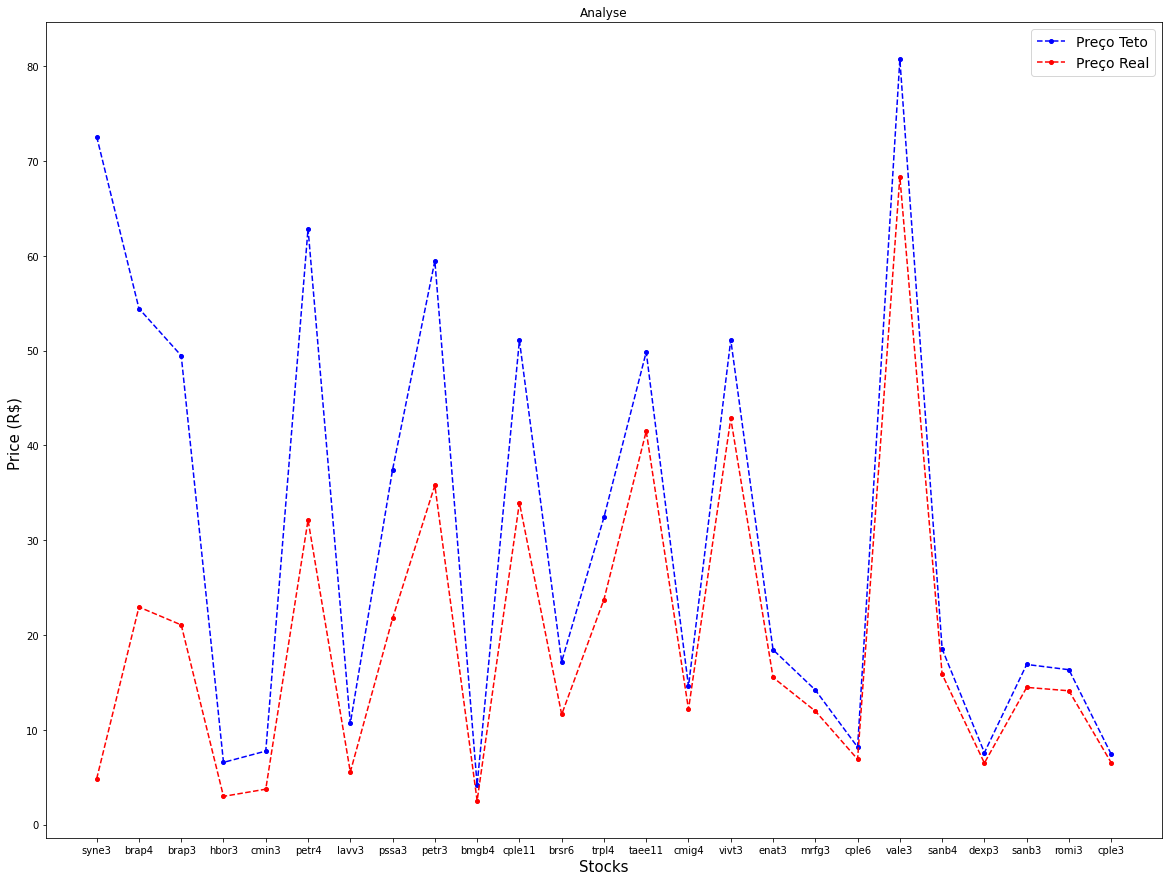

In [11]:
plt.figure(figsize=(20, 15))
plt.plot(Frame['Stocks'], Frame['Preço teto'], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(Frame['Stocks'], Frame['Preço'], linestyle='--', marker='o', color = 'red', markersize = 4)

plt.xlabel('Stocks', fontsize=15)
plt.ylabel('Price (R$) ', fontsize=15)
plt.title('Analyse')
plt.legend(['Preço Teto','Preço Real'], fontsize=14)

Text(0.5, 1.0, 'Analyse')

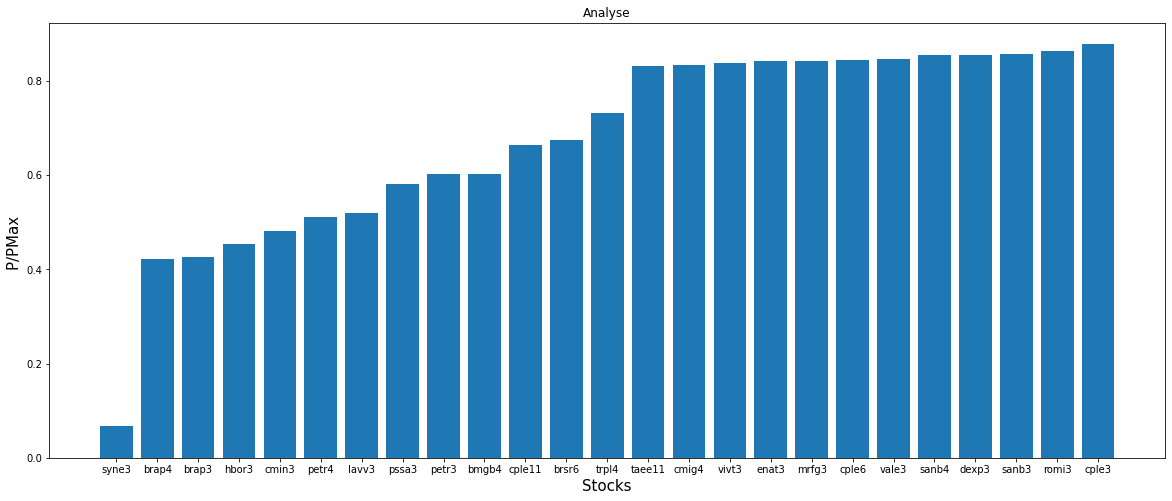

In [12]:
plt.figure(figsize=(20, 8))
plt.bar(D['Stocks'], D['%'])
plt.xlabel('Stocks', fontsize=15)
plt.ylabel('P/PMax ', fontsize=15)
plt.title('Analyse')

Text(0.5, 1.0, 'Analyse')

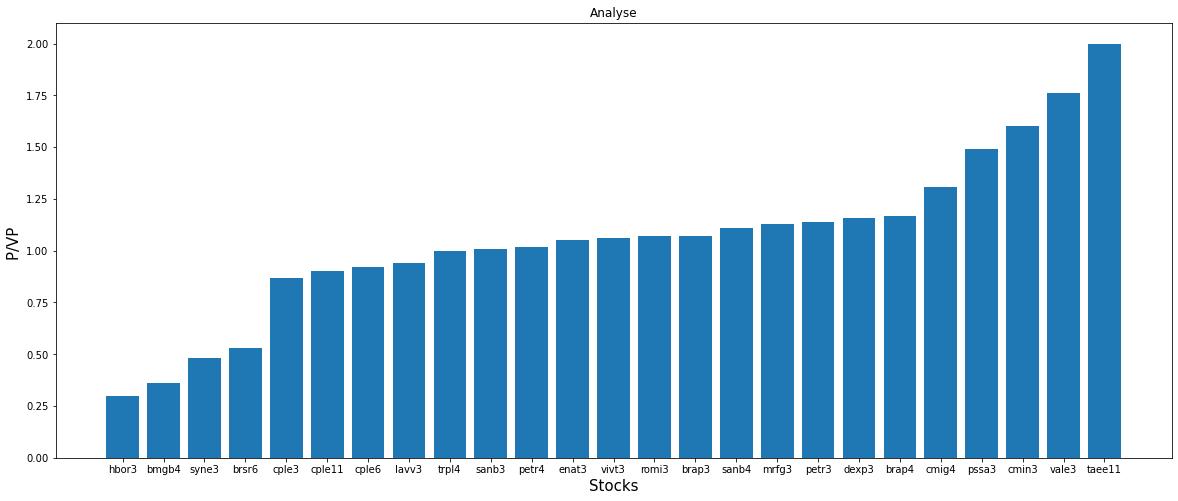

In [13]:
plt.figure(figsize=(20, 8))
plt.bar(P['Stocks'], P['P/VP'])
plt.xlabel('Stocks', fontsize=15)
plt.ylabel('P/VP ', fontsize=15)
plt.title('Analyse')

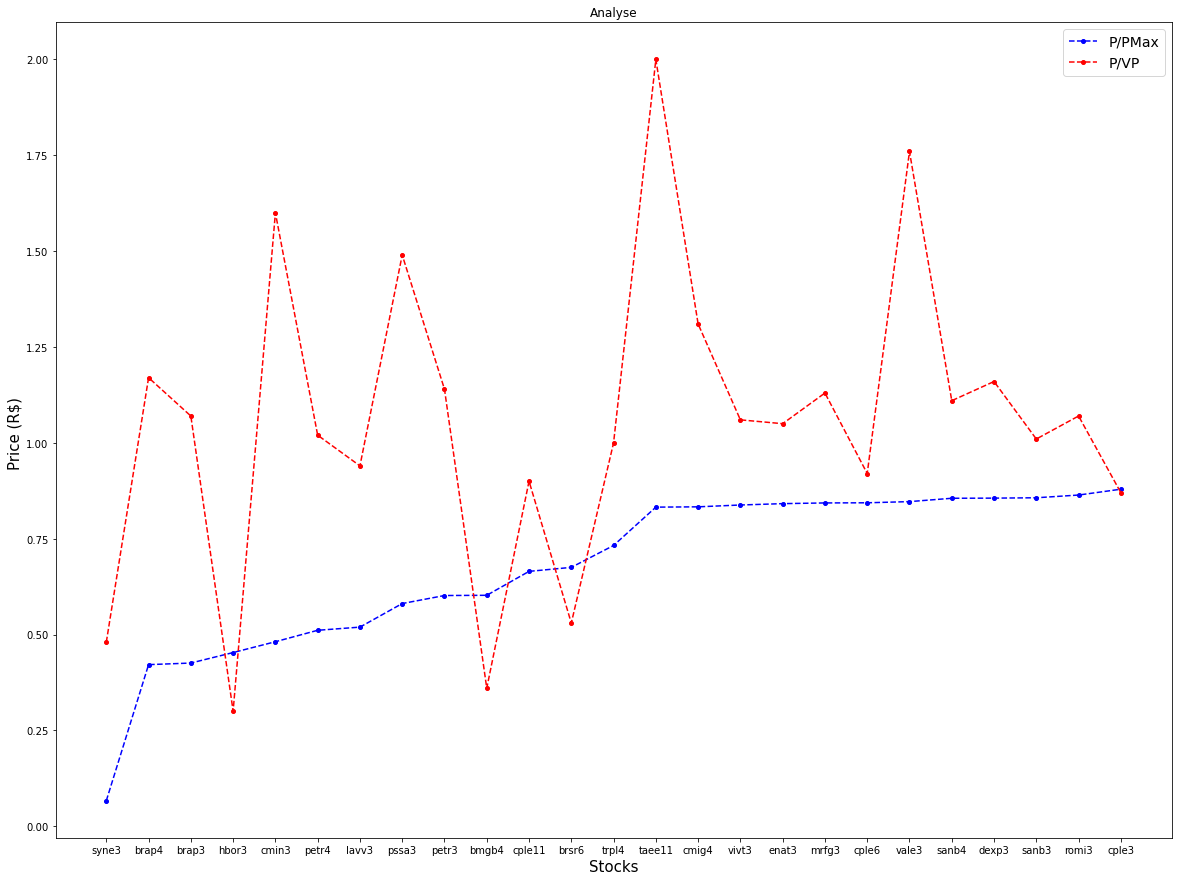

In [14]:
plt.figure(figsize=(20, 15))
plt.plot(Frame['Stocks'], D['%'], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(Frame['Stocks'], Frame['P/VP'], linestyle='--', marker='o', color = 'red', markersize = 4)
plt.xlabel('Stocks', fontsize=15)
plt.ylabel('Price (R$) ', fontsize=15)
plt.title('Analyse')
plt.legend(['P/PMax','P/VP'], fontsize=14)

Text(0.5, 1.0, 'Analyse')

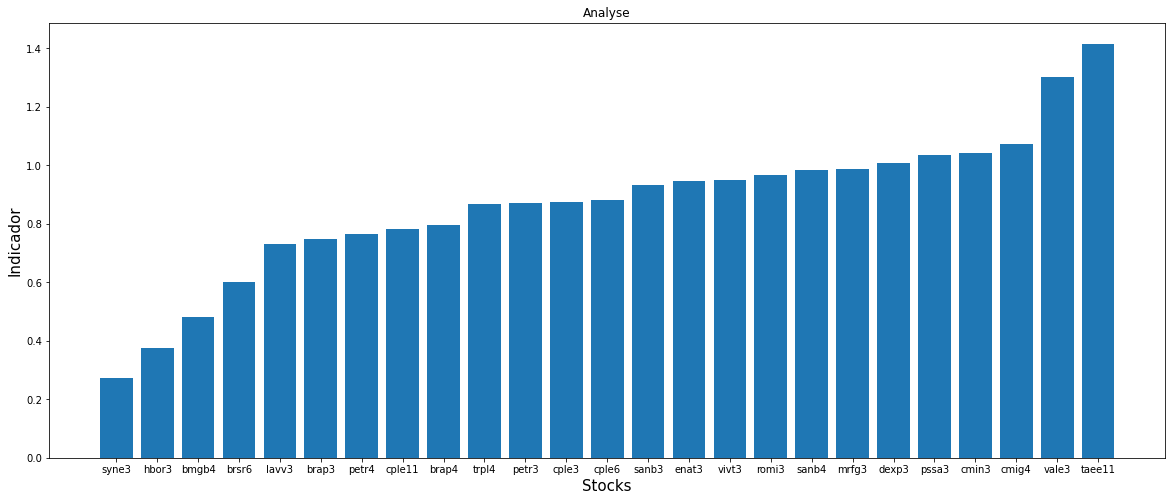

In [15]:
plt.figure(figsize=(20, 8))
plt.bar(Indicador ['Stocks'], Indicador['Ind'])
plt.xlabel('Stocks', fontsize=15)
plt.ylabel('Indicador', fontsize=15)
plt.title('Analyse')